Egyszerű módszer 3D-ben mozgó tömegpont mozgásegyenletének megoldására

In [1]:
# szokásos bevezetés
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# három egyszerű erőfajta, másolva az 1D-s ről

# konstans gyorsulást adó erő
def F_const(x,v,m):
    a_c = 9.81    # konstans gyorsulás értéke
    return(m * a_c)

# rugóerő
def F_rugo(x,v,m):
    D = 100.0 # rugóállandó
    return(-D*x)

# eső testre ható grav + közegellenállási erő
def F_eses(x,v,m):
    g=9.81  # grav gyorsulás
    C=0.47  # alaktényező
    A=0.001  # keresztmetszet mozgásirányban
    rho=1.2 # közeg sűrűség
    return(m*g  - 0.5*C*A*rho*v**2)

In [3]:
# egyszerű, józan eszes léptetés: x és v értékek korrekciója
# feltéve, hogy állandó erő hat dt ideig
# a kód ugyanaz, mint 1D-ben

def lepes(xn, vn, m, F, dt):
    a = F(xn,vn,m) / m  # gyorsulás Newton II-ből
    v_new = vn + a*dt   # konstanssal közelítjük a gyorsulást
    x_new= xn+v_new*dt  # feltesszük, hogy az új sebességgel mozgott. lehetne máshogy?
    
    return(x_new, v_new) # visszaadjuk az új értékekeket

In [4]:
# próbáljuk ki egyszerűen
x0=np.array([0.0, 0.0, 0.0], np.float64)  # itt a különbség 1D-hez képest
v0=np.array([0.0, 0.0, 0.0], np.float64)  # itt a különbség 1D-hez képest
m=1.0

dt=0.1
t_max=1.0

# mozgásegyenlet
x=x0; v=v0
t=0.0

while (t<=t_max+1e-6):
    print(("%.4f\t"+"%.4f\t"*6)%(t,x[0], x[1], x[2], v[0], v[1], v[2]))
    x, v = lepes(x, v, m, F_const, dt)
    t += dt

0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	
0.1000	0.0981	0.0981	0.0981	0.9810	0.9810	0.9810	
0.2000	0.2943	0.2943	0.2943	1.9620	1.9620	1.9620	
0.3000	0.5886	0.5886	0.5886	2.9430	2.9430	2.9430	
0.4000	0.9810	0.9810	0.9810	3.9240	3.9240	3.9240	
0.5000	1.4715	1.4715	1.4715	4.9050	4.9050	4.9050	
0.6000	2.0601	2.0601	2.0601	5.8860	5.8860	5.8860	
0.7000	2.7468	2.7468	2.7468	6.8670	6.8670	6.8670	
0.8000	3.5316	3.5316	3.5316	7.8480	7.8480	7.8480	
0.9000	4.4145	4.4145	4.4145	8.8290	8.8290	8.8290	
1.0000	5.3955	5.3955	5.3955	9.8100	9.8100	9.8100	


In [5]:
# az előző blokkban mindhárom koordináta azonos módon változik, mert az erőfgv-ek 1D-sek 
# és ismétlik magukat mindegyik koordinátában

# igazi 3D-s erőfgv-ek:

# konstans gyorsulást adó erő a 2-es koordinátában
def F_const_3D(r,v,m):
    a_c=np.array([0,0,-9.81], np.float64)   # konstans gyorsulás 3 komponense
    return(m * a_c)

# 3 különböző rugó hatására kialakuló mozgás
def F_rugo_3D(r,v,m):
    D=np.array([100,200,300], np.float64)    # rugóállandó a 3 irányban
    return(-D*r)

# esés: gravitáció a 2. koordinátában, közegellenállás a mozgással ellentétesen
def F_eses_3D(r,v,m):
    g=9.81  # grav gyorsulás
    C=0.47  # alaktényező
    A=0.01  # keresztmetszet mozgásirányban
    rho=1.2 # közeg sűrűség
    
    # gravitációs erő:
    F_out=m*np.array([0,0,-g], np.float64)
    
    # közegellenállás járuléka:
    v_abs=(v[0]**2+v[1]**2+v[2]**2)**0.5
    if v_abs>0.0:   # csak nem-0 sebességnél van közegellenállás
        F_out-=0.5*C*A*rho*v_abs * v
    
    return(F_out)

In [6]:
# most kipróbáljuk:
r0=np.array([0.0, 0.0, 0.0], np.float64)  
v0=np.array([0.0, 0.0, 0.0], np.float64)
dt=0.1
m=1.0

r=r0; v=v0
t=0.0; t_max=1.0

while (t<=t_max+1e-6):
    print(("%.4f\t"+"%.4f\t"*6)%(t,r[0], r[1], r[2], v[0], v[1], v[2]))
    r, v = lepes(r, v, m, F_const_3D, dt)
    t += dt

0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	
0.1000	0.0000	0.0000	-0.0981	0.0000	0.0000	-0.9810	
0.2000	0.0000	0.0000	-0.2943	0.0000	0.0000	-1.9620	
0.3000	0.0000	0.0000	-0.5886	0.0000	0.0000	-2.9430	
0.4000	0.0000	0.0000	-0.9810	0.0000	0.0000	-3.9240	
0.5000	0.0000	0.0000	-1.4715	0.0000	0.0000	-4.9050	
0.6000	0.0000	0.0000	-2.0601	0.0000	0.0000	-5.8860	
0.7000	0.0000	0.0000	-2.7468	0.0000	0.0000	-6.8670	
0.8000	0.0000	0.0000	-3.5316	0.0000	0.0000	-7.8480	
0.9000	0.0000	0.0000	-4.4145	0.0000	0.0000	-8.8290	
1.0000	0.0000	0.0000	-5.3955	0.0000	0.0000	-9.8100	


Text(0, 0.5, 'v_xyz(t)')

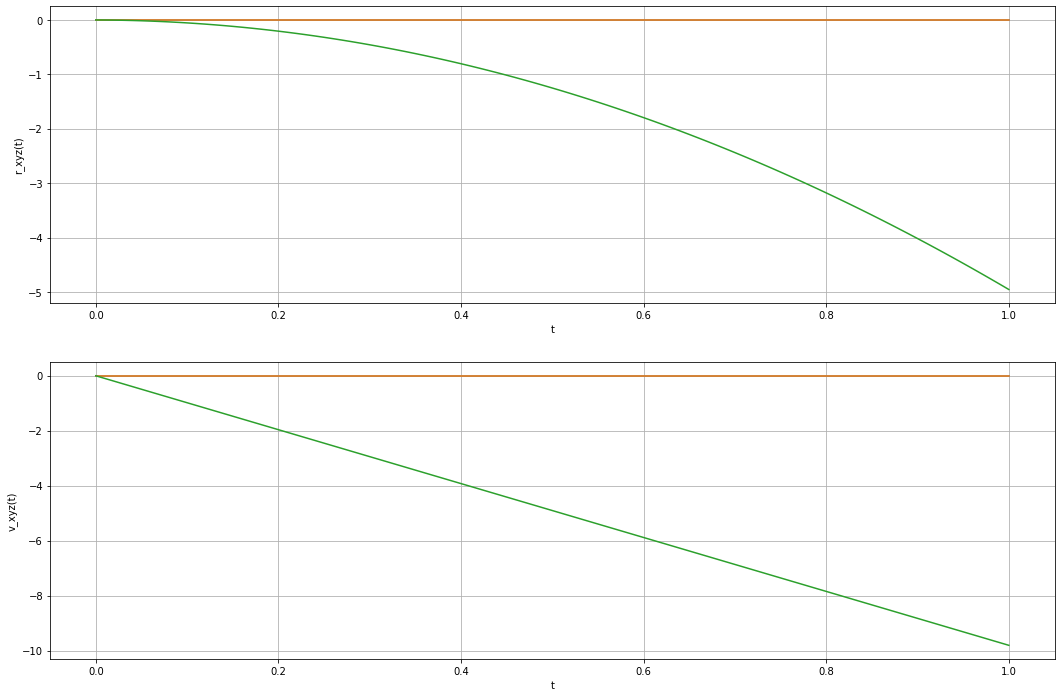

In [7]:
# most rajzoljunk nyomtatás helyett

r0=np.array([0.0, 0.0, 0.0], np.float64)  
v0=np.array([0.0, 0.0, 0.0], np.float64)
dt=0.01
m=1.0

r=r0; v=v0
t=0.0; t_max=1.0

t_list=[]  # listákba pakoljuk az eredményt print helyett
rx_list=[]; ry_list=[]; rz_list=[]
vx_list=[]; vy_list=[]; vz_list=[]
while (t<=t_max+1e-6):
    t_list.append(t)
    vx_list.append(v[0]); vy_list.append(v[1]); vz_list.append(v[2])
    rx_list.append(r[0]); ry_list.append(r[1]); rz_list.append(r[2])
    r, v = lepes(r, v, m, F_const_3D, dt)
    t += dt
    
# most kirajzoljuk
fig=plt.figure(figsize=(18,12))  
ax1=fig.add_subplot(211) # két rész-grafikon
ax2=fig.add_subplot(212)
ax1.plot(t_list, rx_list) # az elsőbe az rx(t)
ax1.plot(t_list, ry_list) # az elsőbe az ry(t)
ax1.plot(t_list, rz_list) # az elsőbe az rz(t)
ax2.plot(t_list, vx_list) # a másodikba a vx(t)
ax2.plot(t_list, vy_list) # a másodikba a vy(t)
ax2.plot(t_list, vz_list) # a másodikba a vz(t)
ax1.grid()
ax2.grid()
ax1.set_xlabel("t")
ax1.set_ylabel("r_xyz(t)")
ax2.set_xlabel("t")
ax2.set_ylabel("v_xyz(t)")

Text(0, 0.5, 'rz')

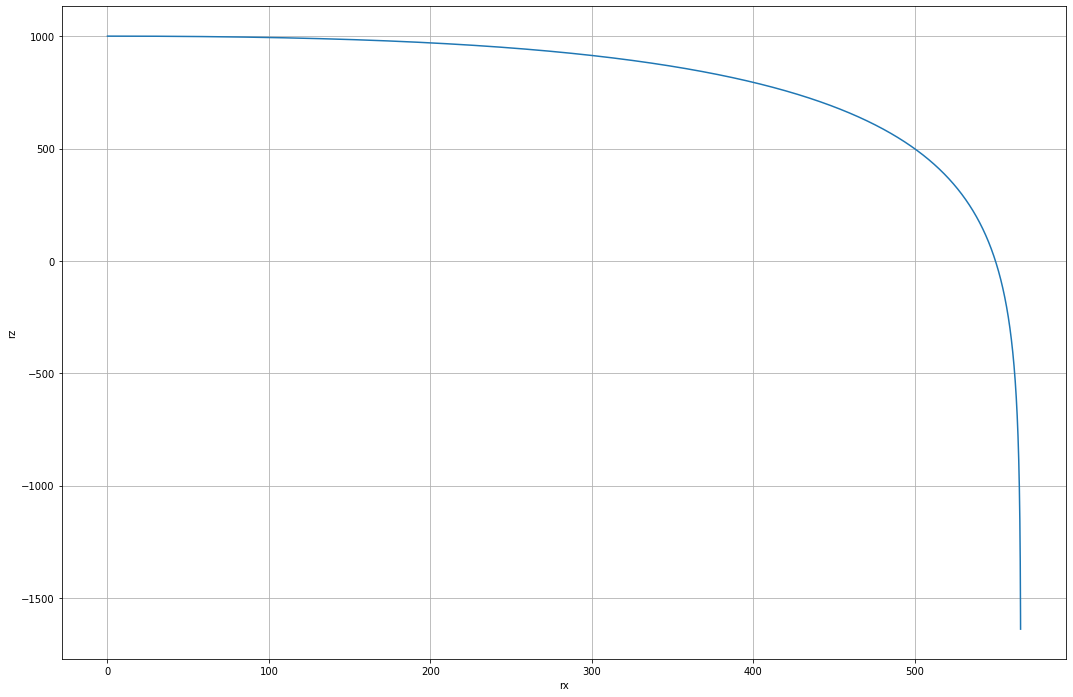

In [8]:
# na, ez nem a legjobb
# ábrázoljuk a pályát
# sajnos csak 2D-t egyszerű ábrázolni,

r0=np.array([0.0, 0.0, 1000.0], np.float64)  
v0=np.array([100.0, 0.0, 0.0], np.float64)
dt=0.01
m=1.0

r=r0; v=v0
t=0.0; t_max=50.0

t_list=[]  # listákba pakoljuk az eredményt print helyett
rx_list=[]; ry_list=[]; rz_list=[]
vx_list=[]; vy_list=[]; vz_list=[]
while (t<=t_max+1e-6):
    t_list.append(t)
    vx_list.append(v[0]); vy_list.append(v[1]); vz_list.append(v[2])
    rx_list.append(r[0]); ry_list.append(r[1]); rz_list.append(r[2])
    r, v = lepes(r, v, m, F_eses_3D, dt)
    t += dt
    
# most kirajzoljuk
fig=plt.figure(figsize=(18,12))  
ax1=fig.add_subplot(111) # egyetlen grafikon a pályának
ax1.plot(rx_list, rz_list) # itt választjuk meg, melyik két koodinátát jelenítjük meg
ax1.grid()
ax1.set_xlabel("rx")
ax1.set_ylabel("rz")